In [29]:
import zarr
import allel
import seaborn as sns
import umap
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Install the malariagen_data package, currently a prerelease
!pip install -q --pre --upgrade --no-cache-dir malariagen-data

In [31]:
import malariagen_data
ag3 = malariagen_data.Ag3("gs://vo_agam_release/", pre=True)

In [32]:
import yaml

In [33]:
#species name dict
sp_sp = {'arab':'arabiensis',
        'gamb_colu': 'gamb_colu'}

In [79]:
#species market dict
sp_mk = {'arabiensis' : "d",
        'gambiae' : 'o',
        'coluzzii': 's',
        'intermediate_gambiae_coluzzii' : '^',
        'intermediate_arabiensis_gambiae' : 'p'}

In [73]:
# #species market dict
# sp_mk = {'arabiensis' : "o",
#         'gambiae' : 'o',
#         'coluzzii': 'o',
#         'intermediate_gambiae_coluzzii' : 'o',
#         'intermediate_arabiensis_gambiae' : 'o'}

### per sample colours

In [34]:
# Load sample metadata
df_samples = ag3.sample_metadata('v3_wild')

In [35]:
#load yaml
with open('location_colours.yaml') as file:
    location_colours = yaml.load(file, Loader=yaml.Loader)

In [75]:
#new column - per sample colours
df_samples['colour'] = df_samples.apply(lambda row: location_colours[row.country][row.location], axis=1)

In [80]:
#new column - per sample markers
df_samples['marker'] = df_samples.apply(lambda row: sp_mk[row.species], axis=1)

In [52]:
df_samples.species_gambcolu_arabiensis.value_counts()

gamb_colu       2415
arabiensis       368
intermediate       1
Name: species_gambcolu_arabiensis, dtype: int64

In [81]:
df_samples[df_samples.species_gambcolu_arabiensis == 'arabiensis']

,index,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,...,sample_set,release,aim_fraction_colu,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii,species,colour,place,marker
269,269,AB0333-C,BF18-11,Austin Burt,Burkina Faso,Bana,2014,7,11.233,-4.472,...,AG1000G-BF-B,v3,0.472,0.731,arabiensis,NaN,arabiensis,#9062c9,"Burkina Faso, Bana",d
324,324,AB0457-C,BF17-34,Austin Burt,Burkina Faso,Pala,2014,7,11.150,-4.235,...,AG1000G-BF-B,v3,0.452,0.712,arabiensis,NaN,arabiensis,#8f62c9,"Burkina Faso, Pala",d
341,341,AB0502-C,BF17-15,Austin Burt,Burkina Faso,Pala,2014,7,11.150,-4.235,...,AG1000G-BF-B,v3,0.441,0.693,arabiensis,NaN,arabiensis,#8f62c9,"Burkina Faso, Pala",d
1012,1012,AN0341-C,621,Brad White,Cameroon,Lagdo,2013,10,9.049,13.656,...,AG1000G-CM-C,v3,0.478,0.651,arabiensis,NaN,arabiensis,#5976bf,"Cameroon, Lagdo",d
1013,1013,AN0338-C,557,Brad White,Cameroon,Lagdo,2013,10,9.049,13.656,...,AG1000G-CM-C,v3,0.493,0.618,arabiensis,NaN,arabiensis,#5976bf,"Cameroon, Lagdo",d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,2571,AC0085-C,3_E2,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,...,AG1000G-UG,v3,0.454,0.733,arabiensis,NaN,arabiensis,#00859a,"Uganda, Nagongera",d
2572,2572,AC0086-C,3_F1,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,...,AG1000G-UG,v3,0.451,0.742,arabiensis,NaN,arabiensis,#00859a,"Uganda, Nagongera",d
2573,2573,AC0087-Cx,3_F2,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,...,AG1000G-UG,v3,0.454,0.741,arabiensis,NaN,arabiensis,#00859a,"Uganda, Nagongera",d
2574,2574,AC0088-C,3_G1,Martin Donnelly,Uganda,Nagongera,2012,10,0.770,34.026,...,AG1000G-UG,v3,0.460,0.747,arabiensis,NaN,arabiensis,#00859a,"Uganda, Nagongera",d


In [39]:
df_samples['place'] = df_samples[['country', 'location']].apply(lambda x: ', '.join(x), axis=1)
df_samples.head()

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,sample_set,release,aim_fraction_colu,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii,species,colour,place
0,AR0047-C,LUA047,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,v3,0.945,0.001,gamb_colu,coluzzii,coluzzii,#837371,"Angola, Luanda"
1,AR0049-C,LUA049,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,v3,0.933,0.001,gamb_colu,coluzzii,coluzzii,#837371,"Angola, Luanda"
2,AR0051-C,LUA051,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,v3,0.937,0.002,gamb_colu,coluzzii,coluzzii,#837371,"Angola, Luanda"
3,AR0061-C,LUA061,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,v3,0.938,0.002,gamb_colu,coluzzii,coluzzii,#837371,"Angola, Luanda"
4,AR0078-C,LUA078,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,v3,0.926,0.001,gamb_colu,coluzzii,coluzzii,#837371,"Angola, Luanda"


## Downsample populations

First downsample larger populations to give a more balanced view, then look at species colour.

In [40]:
def downsample(pops, n=50):
    #chop down df depending on pop
    if pops == 'arab' or pops == 'gamb_colu':
        df_pop = df_samples.loc[df_samples.species_gambcolu_arabiensis == sp_sp[pops]]
    else:
        df_pop = df_samples
    df_pop.reset_index(inplace=True)
    pop_all = df_pop.sample_set.unique()
    print(pop_all)
    idxs = []
    for pop in pop_all:
        pop_idxs = df_pop[df_pop.sample_set == pop].index.values
        if len(pop_idxs) > n:
            pop_idxs = np.random.choice(pop_idxs, size=n, replace=False)
        idxs.extend(pop_idxs)
    # randomly shuffle for better plotting
    np.random.shuffle(idxs)
    return idxs

# plot

In [13]:
#points are coloured by individual's country+location
def umapper_downsampled(pops, legend=False):
    ac = zarr.open('../data/allele_counts_for_pca_umap/'+pops+'.pca_umap_input_alleles.zarr.zip', mode='r')
    if pops == 'arab' or pops == 'gamb_colu':
        df = df_samples.loc[df_samples.species_gambcolu_arabiensis == sp_sp[pops]]
    elif pops == 'gamb_colu_arab':
        df = df_samples
    else:
        print('pops should be either "arab", "gamb_colu" or "gamb_colu_arabiensis"')
    print(ac['allele_counts_pca_ready'][:].shape, len(df))
    
    
    #downsample
    idxs_ds50 = downsample(pops=pops, n=50)
    df_ds50 = df.iloc[idxs_ds50]
    ac_ds50 = ac['allele_counts_pca_ready'][:].take(idxs_ds50, axis=1)
    print(ac_ds50.shape, len(df_ds50))
    
    #bizniz
    sns.set(style='white', context='paper', font_scale=1.2)
    sns.set(style='ticks')
    
    #umap
    reducer = umap.UMAP(n_components=2, n_neighbors=100, min_dist=0.5, metric='euclidean')
    #reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=2, spread=5, metric='euclidean')

    
    embedding = reducer.fit_transform(ac_ds50.T)
    
    #plot
    fig, ax = plt.subplots(figsize=(8, 8))
    scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=df_ds50.colour, edgecolor='w', s=50)
    
    #legend
    if legend != False:
        labels = df_ds50.place.unique()
        col_dict = {x : df_ds50.loc[df_ds50.place == x].colour.unique()[0] for x in labels}
        handles = []
        for lab in labels:
            patch = plt.Line2D([], [], color=col_dict[lab], marker='o',
                               markersize=12, label=lab, linestyle=' ')
            handles.append(patch)
        fig.legend(handles=handles, loc='center left', bbox_to_anchor=(1, .5), )
    fig.tight_layout()

(40862, 368) 368
['AG1000G-BF-B' 'AG1000G-CM-C' 'AG1000G-KE' 'AG1000G-ML-B' 'AG1000G-MW'
 'AG1000G-TZ' 'AG1000G-UG']
(40862, 161) 161


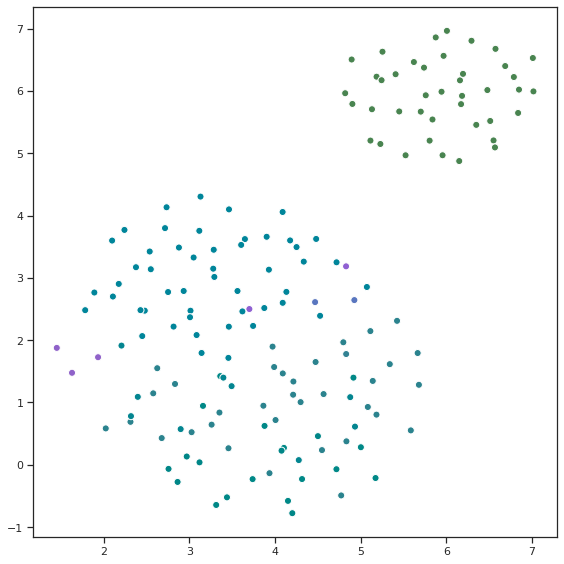

In [14]:
umapper_downsampled('arab')

(81239, 2415) 2415
['AG1000G-AO' 'AG1000G-BF-A' 'AG1000G-BF-B' 'AG1000G-BF-C' 'AG1000G-CD'
 'AG1000G-CF' 'AG1000G-CI' 'AG1000G-CM-A' 'AG1000G-CM-B' 'AG1000G-CM-C'
 'AG1000G-FR' 'AG1000G-GA-A' 'AG1000G-GH' 'AG1000G-GM-A' 'AG1000G-GM-B'
 'AG1000G-GM-C' 'AG1000G-GN-A' 'AG1000G-GN-B' 'AG1000G-GQ' 'AG1000G-GW'
 'AG1000G-KE' 'AG1000G-ML-A' 'AG1000G-ML-B' 'AG1000G-MZ' 'AG1000G-TZ'
 'AG1000G-UG']
(81239, 1164) 1164


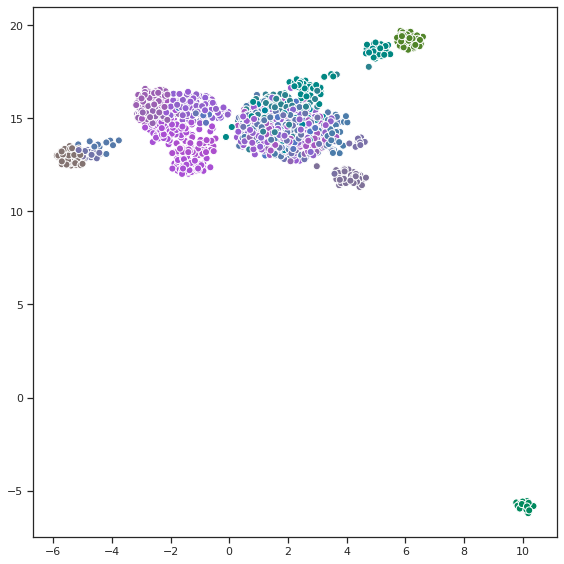

In [15]:
#n_n 100
umapper_downsampled('gamb_colu')

(81901, 2784) 2784
['AG1000G-AO' 'AG1000G-BF-A' 'AG1000G-BF-B' 'AG1000G-BF-C' 'AG1000G-CD'
 'AG1000G-CF' 'AG1000G-CI' 'AG1000G-CM-A' 'AG1000G-CM-B' 'AG1000G-CM-C'
 'AG1000G-FR' 'AG1000G-GA-A' 'AG1000G-GH' 'AG1000G-GM-A' 'AG1000G-GM-B'
 'AG1000G-GM-C' 'AG1000G-GN-A' 'AG1000G-GN-B' 'AG1000G-GQ' 'AG1000G-GW'
 'AG1000G-KE' 'AG1000G-ML-A' 'AG1000G-ML-B' 'AG1000G-MW' 'AG1000G-MZ'
 'AG1000G-TZ' 'AG1000G-UG']
(81901, 1207) 1207


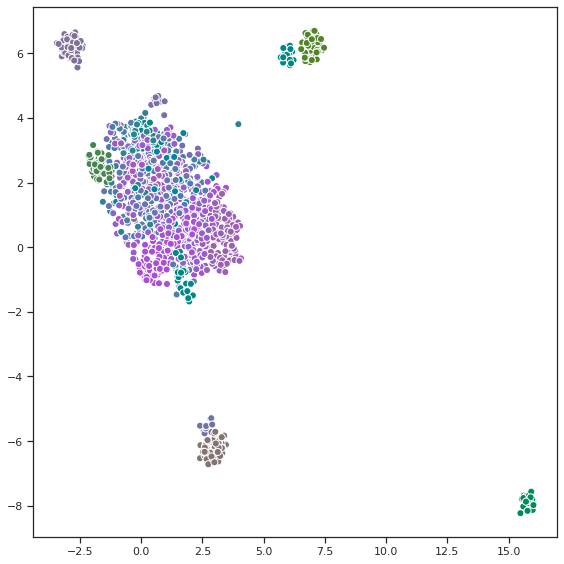

In [16]:
umapper_downsampled('gamb_colu_arab')

### thoughts
- difficult to read.
- we could average hex colours - could produce one colour per country/region/something - might make it easier to read.
- we could superimpose a map with the colour gradient?
- what does colour by species look like?

## markers for species

In [67]:
#scatter can't take a list of markers
def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc

In [84]:
#points are coloured by individual's country+location
def umapper_species(pops, legend=False):
    ac = zarr.open('../data/allele_counts_for_pca_umap/'+pops+'.pca_umap_input_alleles.zarr.zip', mode='r')
    if pops == 'arab' or pops == 'gamb_colu':
        df = df_samples.loc[df_samples.species_gambcolu_arabiensis == sp_sp[pops]]
    elif pops == 'gamb_colu_arab':
        df = df_samples
    else:
        print('pops should be either "arab", "gamb_colu" or "gamb_colu_arabiensis"')
    print(ac['allele_counts_pca_ready'][:].shape, len(df))
    
    
    #downsample
    idxs_ds50 = downsample(pops=pops, n=50)
    df_ds50 = df.iloc[idxs_ds50]
    ac_ds50 = ac['allele_counts_pca_ready'][:].take(idxs_ds50, axis=1)
    print(ac_ds50.shape, len(df_ds50))
    
    #bizniz
    sns.set(style='white', context='paper', font_scale=1.2)
    sns.set(style='ticks')
    
    #umap
    reducer = umap.UMAP(n_components=2, n_neighbors=100, min_dist=0.5, metric='euclidean')
    #reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=2, spread=5, metric='euclidean')

    
    embedding = reducer.fit_transform(ac_ds50.T)
    
    #plot
    fig, ax = plt.subplots(figsize=(8, 8))
    scatter = mscatter(embedding[:, 0], embedding[:, 1], c=df_ds50.colour, m=df_ds50.marker, edgecolor='w')
    
    # colour legend
#     if legend != False:
#         labels = df_ds50.place.unique()
#         col_dict = {x : df_ds50.loc[df_ds50.place == x].colour.unique()[0] for x in labels}
#         handles = []
#         for lab in labels:
#             patch = plt.Line2D([], [], color=col_dict[lab], marker='o',
#                                markersize=12, label=lab, linestyle=' ')
#             handles.append(patch)
#         fig.legend(handles=handles, loc='center left', bbox_to_anchor=(1, .5), )
    markers = [plt.Line2D([0,0],[0,0],color='k', marker=mark, linestyle='') for mark in sp_mk.values()]
    plt.legend(markers, sp_mk.keys(), numpoints=1)
    fig.tight_layout()

(40862, 368) 368
['AG1000G-BF-B' 'AG1000G-CM-C' 'AG1000G-KE' 'AG1000G-ML-B' 'AG1000G-MW'
 'AG1000G-TZ' 'AG1000G-UG']
(40862, 161) 161


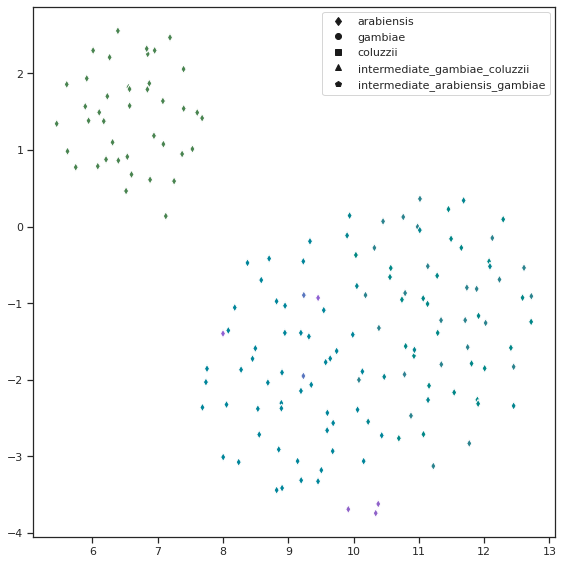

In [85]:
umapper_species('arab')

(81239, 2415) 2415
['AG1000G-AO' 'AG1000G-BF-A' 'AG1000G-BF-B' 'AG1000G-BF-C' 'AG1000G-CD'
 'AG1000G-CF' 'AG1000G-CI' 'AG1000G-CM-A' 'AG1000G-CM-B' 'AG1000G-CM-C'
 'AG1000G-FR' 'AG1000G-GA-A' 'AG1000G-GH' 'AG1000G-GM-A' 'AG1000G-GM-B'
 'AG1000G-GM-C' 'AG1000G-GN-A' 'AG1000G-GN-B' 'AG1000G-GQ' 'AG1000G-GW'
 'AG1000G-KE' 'AG1000G-ML-A' 'AG1000G-ML-B' 'AG1000G-MZ' 'AG1000G-TZ'
 'AG1000G-UG']
(81239, 1164) 1164


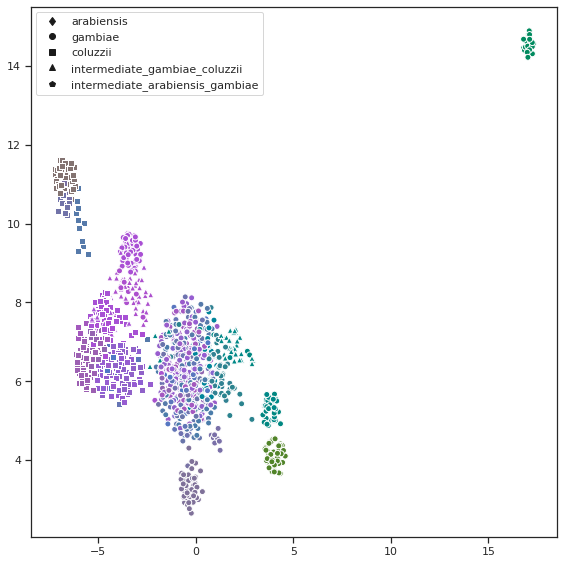

In [86]:
umapper_species('gamb_colu')

(81901, 2784) 2784
['AG1000G-AO' 'AG1000G-BF-A' 'AG1000G-BF-B' 'AG1000G-BF-C' 'AG1000G-CD'
 'AG1000G-CF' 'AG1000G-CI' 'AG1000G-CM-A' 'AG1000G-CM-B' 'AG1000G-CM-C'
 'AG1000G-FR' 'AG1000G-GA-A' 'AG1000G-GH' 'AG1000G-GM-A' 'AG1000G-GM-B'
 'AG1000G-GM-C' 'AG1000G-GN-A' 'AG1000G-GN-B' 'AG1000G-GQ' 'AG1000G-GW'
 'AG1000G-KE' 'AG1000G-ML-A' 'AG1000G-ML-B' 'AG1000G-MW' 'AG1000G-MZ'
 'AG1000G-TZ' 'AG1000G-UG']
(81901, 1207) 1207


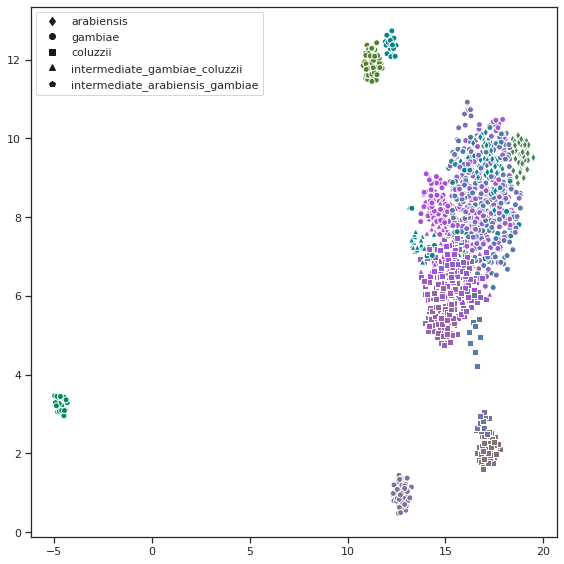

In [87]:
umapper_species('gamb_colu_arab')

## what about 3D

In [17]:
def draw_umap_3D(pops, n_neighbors=100, min_dist=0.5, n_components=2, metric='euclidean'):
    
    ac = zarr.open('../data/allele_counts_for_pca_umap/'+pops+'.pca_umap_input_alleles.zarr.zip', mode='r')
    if pops == 'arab' or pops == 'gamb_colu':
        df = df_samples.loc[df_samples.species_gambcolu_arabiensis == sp_sp[pops]]
    elif pops == 'gamb_colu_arab':
        df = df_samples
    else:
        print('pops should be either "arab", "gamb_colu" or "gamb_colu_arabiensis"')
    print(ac['allele_counts_pca_ready'][:].shape, len(df))
    
    
    #downsample
    idxs_ds50 = downsample(pops=pops, n=50)
    df_ds50 = df.iloc[idxs_ds50]
    ac_ds50 = ac['allele_counts_pca_ready'][:].take(idxs_ds50, axis=1)
    print(ac_ds50.shape, len(df_ds50))
    
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    
    u = reducer.fit_transform(ac_ds50.T);
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(u[:,0], u[:,1], u[:,2], c=df_ds50.colour, edgecolor='w', s=100)


(40862, 368) 368
['AG1000G-BF-B' 'AG1000G-CM-C' 'AG1000G-KE' 'AG1000G-ML-B' 'AG1000G-MW'
 'AG1000G-TZ' 'AG1000G-UG']
(40862, 161) 161


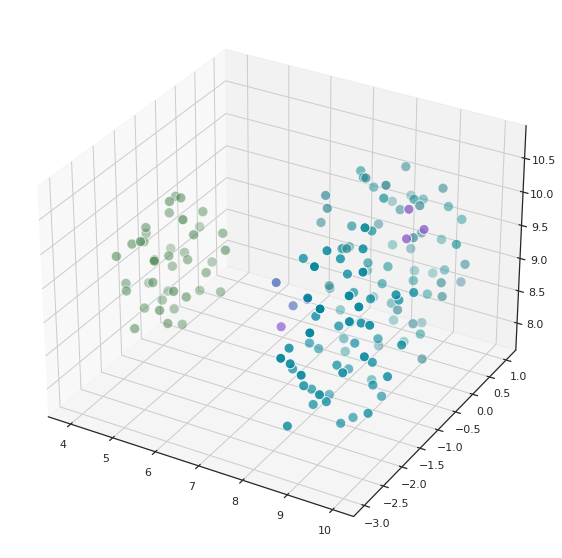

In [18]:
draw_umap_3D(pops='arab', n_components=3)

(81239, 2415) 2415
['AG1000G-AO' 'AG1000G-BF-A' 'AG1000G-BF-B' 'AG1000G-BF-C' 'AG1000G-CD'
 'AG1000G-CF' 'AG1000G-CI' 'AG1000G-CM-A' 'AG1000G-CM-B' 'AG1000G-CM-C'
 'AG1000G-FR' 'AG1000G-GA-A' 'AG1000G-GH' 'AG1000G-GM-A' 'AG1000G-GM-B'
 'AG1000G-GM-C' 'AG1000G-GN-A' 'AG1000G-GN-B' 'AG1000G-GQ' 'AG1000G-GW'
 'AG1000G-KE' 'AG1000G-ML-A' 'AG1000G-ML-B' 'AG1000G-MZ' 'AG1000G-TZ'
 'AG1000G-UG']
(81239, 1164) 1164


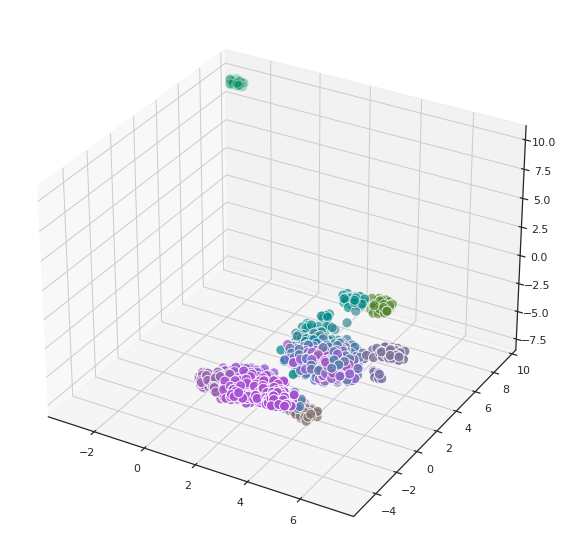

In [21]:
draw_umap_3D(pops='gamb_colu', n_components=3)

(81901, 2784) 2784
['AG1000G-AO' 'AG1000G-BF-A' 'AG1000G-BF-B' 'AG1000G-BF-C' 'AG1000G-CD'
 'AG1000G-CF' 'AG1000G-CI' 'AG1000G-CM-A' 'AG1000G-CM-B' 'AG1000G-CM-C'
 'AG1000G-FR' 'AG1000G-GA-A' 'AG1000G-GH' 'AG1000G-GM-A' 'AG1000G-GM-B'
 'AG1000G-GM-C' 'AG1000G-GN-A' 'AG1000G-GN-B' 'AG1000G-GQ' 'AG1000G-GW'
 'AG1000G-KE' 'AG1000G-ML-A' 'AG1000G-ML-B' 'AG1000G-MW' 'AG1000G-MZ'
 'AG1000G-TZ' 'AG1000G-UG']
(81901, 1207) 1207


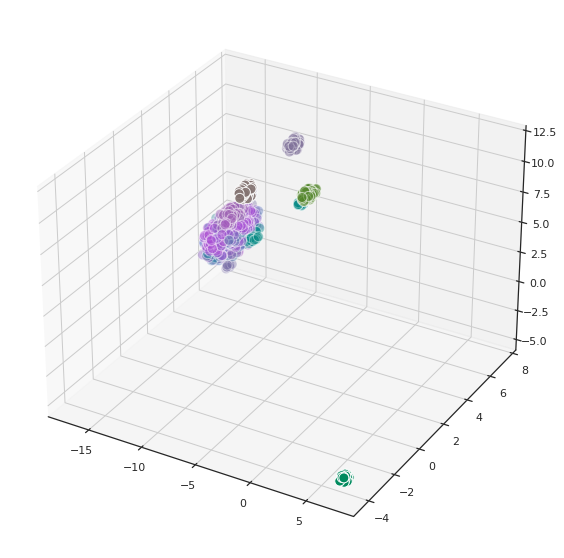

In [22]:
draw_umap_3D(pops='gamb_colu_arab', n_components=3)

# things to do
- add seed to fix UMAP at a nice point
- if we use 2D fix legend so that only subsampled sp types are in legend
- interactive 3D plots (ipyvolume doesn't seem to work on the cloud - widgets?)